# Sample code for exercise 3-1
2017 Aug. Tsuyoshi Okubo  
2018 Dec. modified

In this code, you can perform TEBD simulation of the ground state of spin model on 1d chain.  
$$\mathcal{H} = \sum_{i} J_z S_{i,z}S_{i+1,z} + J_{xy} (S_{i,x}S_{i+1,x} + S_{i,y}S_{i+1,y}) - h_x \sum_i S_{i,x} + D\sum_i S_{i,z}^2$$

Note that, the accuracy of the calculation depends on chi_max, tau, and iteration steps.
tau is gradually decreases from tau_max to tau_min


You can change   

- N: # of sites
- m: size of spin  (2S = 2m + 1)  
- Jz: amplitude of SzSz interaction  
- Jxy: amplitude of SxSx + SySy interaction  
- hx : amplitude of external field alogn x direction  
- D : Single ion anisotropy  
- (periodic: In this exercize, we only consider open boundary)
- chi_max : maximum bond dimension of MPS
- tau_max : maximum value of tau
- tau_min : minimum value of tau
- T_step : Total ITE steps
- output_dyn_num : output data step

In [1]:
import numpy as np
import scipy.linalg as linalg
import ED
import TEBD
from matplotlib import pyplot

In [2]:
N=10          ## Chain length 
m = 3         ## m = 2S + 1, e.g. m=3 for S=1 
Jz = 1.0      ## Jz for SzSz interaction
Jxy = 1.0     ## Jxy for SxSx + SySy interaction
hx = 0.0      ## external field along x direction
D = 0.0       ## single ion anisotropy
#periodic = False ## in this exersize , we only consider open boundary

chi_max = 20  ## maxmum bond dimension at truncation

tau_max = 0.1     ## start imaginary time tau
tau_min = 0.001   ## final imaginary time tau
T_step=2000       ## ITE steps
output_dyn_num = 100 ## output steps

In [3]:
print("2S = m - 1, N-site spin chain")
print("N = "+repr(N))
print("m = "+repr(m))
print("Hamiltonian parameters:")
print("Jz = "+repr(Jz))
print("Jxy = "+repr(Jxy))
print("hx = "+repr(hx))
print("D = "+repr(D))

print("chi_max = "+repr(chi_max))

print("tau_max = "+repr(tau_max))
print("tau_min = "+repr(tau_min))
print("T_step = "+repr(T_step))
print("output_dyn_num = "+repr(output_dyn_num))

2S = m - 1, N-site spin chain
N = 10
m = 3
Hamiltonian parameters:
Jz = 1.0
Jxy = 1.0
hx = 0.0
D = 0.0
chi_max = 20
tau_max = 0.1
tau_min = 0.001
T_step = 2000
output_dyn_num = 100


In [4]:
## Obtain the smallest eigenvalue
eig_val,eig_vec = ED.Calc_GS(m,Jz, Jxy,hx,D,N,k=1)
Eg = eig_val[0]/(N-1)

In [5]:
##TEBD simulation
Tn, lam,T_list,E_list,mz_list = TEBD.TEBD_Simulation(m,Jz,Jxy,hx,D,N,chi_max,tau_max,tau_min,T_step,output_dyn=True,output_dyn_num=output_dyn_num)

##Dyn 0.0 -1.0 1.0 array([ 1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.])
##Dyn 1.956898387873087 -1.4196055658998779 0.5747141796709836 array([ 0.68918994, -0.49893281,  0.57697668, -0.53854267,  0.55193742,
       -0.55193742,  0.53854267, -0.57697668,  0.49893281, -0.68918994])
##Dyn 3.8257218398891855 -1.4254287963233325 0.44941116433989675 array([ 0.58668646, -0.38508598,  0.45137373, -0.39014844,  0.40175329,
       -0.40175329,  0.39014844, -0.45137373,  0.38508598, -0.58668646])
##Dyn 5.610434381147543 -1.4272721053365685 0.38855331765342865 array([ 0.51715439, -0.33265806,  0.38995732, -0.33031049,  0.33998033,
       -0.33998033,  0.33031049, -0.38995732,  0.33265806, -0.51715439])
##Dyn 7.314821626228748 -1.4285851590168803 0.3348125682045928 array([ 0.44701648, -0.28668641,  0.33611059, -0.2835171 ,  0.29177418,
       -0.29177418,  0.28351711, -0.3361106 ,  0.28668641, -0.44701648])
##Dyn 8.942498808990797 -1.4295396184525373 0.2838771188556306 array([ 0.37896066, -0.24

##Dyn 36.58843619252498 -1.4326563862687582 0.0071244197112387605 array([ 0.00937471, -0.00611793,  0.00723043, -0.00607308,  0.00626986,
       -0.00626986,  0.00607308, -0.00723043,  0.00611793, -0.00937471])
##Dyn 36.89858368585276 -1.4326617486229876 0.006832267420423166 array([ 0.00898947, -0.00586694,  0.00693491, -0.00582383,  0.00601314,
       -0.00601314,  0.00582383, -0.00693491,  0.00586694, -0.00898947])
##Dyn 37.19477224255396 -1.4326666475691576 0.00656472655280763 array([ 0.00863675, -0.0056371 ,  0.00666425, -0.00559554,  0.00577802,
       -0.00577802,  0.00559554, -0.00666425,  0.0056371 , -0.00863675])
##Dyn 37.47763011826798 -1.4326711239281655 0.006319261203237493 array([ 0.00831319, -0.0054262 ,  0.0064159 , -0.00538607,  0.00556228,
       -0.00556228,  0.00538607, -0.0064159 ,  0.0054262 , -0.00831319])
##Dyn 37.74775729247265 -1.4326752148442166 0.006093643756750142 array([ 0.00801585, -0.00523236,  0.00618762, -0.00519351,  0.00536395,
       -0.00536395,  0.

##Dyn 42.38731253695773 -1.4327176509983697 0.0032873779436244977 array([ 0.00432262, -0.0028205 ,  0.00334605, -0.00279617,  0.00289472,
       -0.00289472,  0.00279617, -0.00334605,  0.0028205 , -0.00432262])
##Dyn 42.43646760204115 -1.4327178206148075 0.003266252495900547 array([ 0.00429486, -0.00280233,  0.00332464, -0.0027781 ,  0.00287611,
       -0.00287611,  0.0027781 , -0.00332464,  0.00280233, -0.00429486])
##Dyn 42.48341032476122 -1.4327179771380116 0.00324621168551599 array([ 0.00426853, -0.0027851 ,  0.00330433, -0.00276096,  0.00285846,
       -0.00285846,  0.00276096, -0.00330433,  0.0027851 , -0.00426853])
##Dyn 42.528240276926525 -1.4327181216380358 0.0032271941296683057 array([ 0.00424355, -0.00276875,  0.00328505, -0.0027447 ,  0.00284171,
       -0.00284171,  0.0027447 , -0.00328505,  0.00276875, -0.00424355])
##Dyn 42.57105254887609 -1.4327182550944149 0.0032091424202310252 array([ 0.00421983, -0.00275323,  0.00326676, -0.00272926,  0.0028258 ,
       -0.0028258 , 

In [6]:
## Calculate Energy
Env_left,Env_right = TEBD.Calc_Environment(Tn,lam,canonical=False)
E_mps = TEBD.Calc_Energy(Env_left,Env_right,Tn,lam,Jz,Jxy,hx,D)

print("Ground state energy per bond = " +repr(Eg))
print("TEBD energy per bond = " + repr(E_mps))

Ground state energy per bond = -1.432728903578993
TEBD energy per bond = -1.4327194356222506


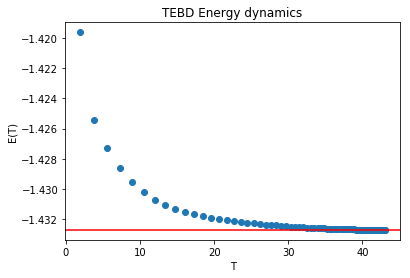

In [7]:
## plot energy dynamics
pyplot.title("TEBD Energy dynamics")
pyplot.plot(T_list[1:],E_list[1:],"o")
pyplot.xlabel("T")
pyplot.ylabel("E(T)")
pyplot.axhline(y=Eg, color='red')
pyplot.show()
